<a href="https://colab.research.google.com/github/penguin1109/KEDxBOAZ/blob/master/EmbeddingTransformerModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 대분류 학습하고 예측값 도출해 내기
2. Embedding Layer및 tensor에 있어서 뭐가 문제인지 파악하기

#### 우리의 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from konlpy.tag import Hannanum
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Model

In [9]:
import os
data_root = '/content/drive/MyDrive/KEDxBOAZMY/DATA/FINALDATA'
traindata_route = os.path.join(data_root, 'train_dfC.csv')
traindata = pd.read_csv(traindata_route, index_col = 0)

In [28]:
traindata.head()

,BZ_PPOS_ITM_CTT
G46699,건축자재 소매업 부동산업 주택사업 호에관련된
C10309,농산물 제조 유통 가공 판매 농작업 전부 일부 대행 농산물 연구사업 인터넷상품중개업...
A01159,관광농업 농업 공동이용시설 설치 운영 농기계 시설 대여사업 농작업 대행 농산물 ...
F42201,강화플라스틱 공사업 일반 내산배관자재 밸브 도소매업 발전설비 장비 기자재 도소매업 ...
G4631,농기계 농약 비료 포장재 기타농자재 공동구입 판매사업 농산물 저장사업 저온창고 ...


#### test data clensing + removestopwords 적용해서 저장하기

In [25]:
testpath = '/content/drive/MyDrive/KEDxBOAZMY/DATA/FINALDATA/test.csv'
testdata = pd.read_csv(testpath, index_col = 0)

In [26]:
testdata.head()

,BZ_PPOS_ITM_CTT
7869996,[이동통신기기 도소매업 부동산 임대업 전대업 무역업 부대하 농수산물 판매 수입업 농...
7865325,[상품중개업 생활용품 특산품 식품 농수산물 무역업 특산품 생활용품 식품 농수산물 유...
7871662,[화장품 미용용품 수출입업 마케팅 이벤트 행사업 전자상거래업 부동산 임대 전대업 엔...
7871535,[터널 강지보 제조업 밴딩가공 철구조물 제조업 철구조물 제조 도소매업 철구조물 임대...
7872703,[전원주택 펜션 임대업 매매업 주택신축 판매업 부동산 임대업 매매업 부동산 개발 분...


In [ ]:
!pip install Konlpy

In [8]:
from konlpy.tag import Hannanum

In [9]:
seqs = []
hannanum = Hannanum()
for seq in testdata['BZ_PPOS_ITM_CTT']:
  seqs.append(hannanum.nouns(seq))

In [11]:
testdata['BZ_PPOS_ITM_CTT'] = seqs

In [ ]:
seqs[0]

In [14]:
def clean_text(data, iscsv = True):
    #hannanum = Hannanum()
    result = []
    # 무조건 문자열로 바꾸어주는 astype(str)
    if iscsv == True:
      data = data['BZ_PPOS_ITM_CTT'].astype(str)
    else:
      data = data.astype(str)
    import re
    FILTERS = "([~.,!?\"':;)(])" 
    
    # 최종적으로 특수 문자를 모두 제거
    
    CHANGE_FILTER = re.compile(FILTERS)
    for sentence in data:
        sentence = re.sub(CHANGE_FILTER, "", sentence)
        #sentence = hannanum.nouns(sentence)
        result.append(sentence)
        
    return pd.DataFrame(data = result, index = data.index.values, columns = ['BZ_PPOS_ITM_CTT'])

In [15]:
df = clean_text(testdata)

In [17]:
df.to_csv(testpath)

In [ ]:
#!pip install konlpy
from konlpy.tag import Hannanum
hannanum = Hannanum()
hannanum.nouns(traindata['BZ_PPOS_ITM_CTT'][1])

In [ ]:
import re
FILTERS = "([~.,!?\"':;)(])" 
CHANGE_FILTER = re.compile(FILTERS)
    

sentence = re.sub(CHANGE_FILTER, "", traindata['BZ_PPOS_ITM_CTT'][100])
#sentence = mecab.morphs(sentence)
sentence = hannanum.nouns(sentence)
print(sentence)
        

['도소매업중', '조경수판매업', '도소매업중', '조경시설물', '판매업', '부동산', '임대업', '서비스업중', '조경설계', '사업', '건설업중', '조경식재공사업', '건설업중', '조경시설물설치공사업', '건설업중', '석공사업', '건설업중', '철근콘크리트공사업', '종합건설업중', '토목건축공사업', '종합건설업중', '토목공사업', '종합건설업중', '조경공사업', '도소매업중', '초화', '판매업', '조경자재', '우두칩', '판매업', '도소매업중', '야자매트판매업']


In [20]:
def remove_stopwords(data, path, iscsv):
  import numpy as np
  import pandas as pd
  """
  data -> DataFrame 형태로 입력
  path ->  stopwords의 저장경로
  """
  stopwords = pd.read_excel(path)
  stopwords = np.array(stopwords['불용어'])
  result = []
  """
    stopwords는 불용어들을 담은 리스트를 입력
    data는 역시나 dataframe의 형태로 입력될 것이며
    모든 행에 대해서 data['BZ_PPOS_ITM_CTT']의 단어들 중에서 stopword에 포함되어 있으면 제거
    
    최종적으로 불용어를 제거한 문자열들을 담은 result 리스트를 return
  """
  for seq in data['BZ_PPOS_ITM_CTT'].astype(str):
    curr = ''
    seq = seq.split(' ')
    for word in seq:
      if len(word) == 1:
        continue
      elif word in stopwords:
        continue
      else:
        curr += ' ' +word
    if curr == '':
      result.append('EMPTY')
    else:
      result.append(curr.strip())
    
  return pd.DataFrame(data = result, index = data.index.values, columns = ['BZ_PPOS_ITM_CTT'])

In [22]:
df = remove_stopwords(testdata,  "/content/drive/MyDrive/KEDxBOAZ/stopwords_2.xlsx", True)

In [24]:
df.to_csv(testpath)

In [ ]:
traindata = traindata.dropna(inplace = True, subset = [traindata.index.values])
traindata.to_csv(traindata_route, index_col = False)

In [ ]:
data = preprocess_all(traindata, True)

In [ ]:
data.to_csv(traindata_route, index_label= False)

In [ ]:
data = remove_stopwords(data, "/content/drive/MyDrive/KEDxBOAZ/stopwords.xlsx", iscsv = False)

In [ ]:
!pip install Konlpy

In [ ]:
data = clean_text(data, iscsv = True)

In [ ]:
data

,BZ_PPOS_ITM_CTT
G46699,건축자재 소매 부동산 주택사 호에관련된
C10309,농산물의 제조 유통 가공 판매 농작업의 전부 일부 대행 농산물 연구사 인터넷상품중개...
A01159,관광농 농업에 공동이용시설의 설치 운영 농기계 시설의 대여사 농작업의 대행 농산물의...
F42201,강화플라스틱 공사 일반 내산배관자재 필터 밸브 도소매 발전설비 장비 기자재 도소매 ...
G4631,농기계 농약 비료 포장재 기타농자재의 공동구입 판매사 농산물 저장사 저온창고 농기계...
...,...
M72111,하수도법에 기술진단전문기관 하수도법에 관리대행 하수도법에 개인하수처리시설 설계 시공...
J58221,소프트웨어 개발 공급 정보서비스 온라인정보 제공 부가통신정보통신 서비스 솔루션개발 ...
G46315,수산물 제조 수출입 수산물 유통 판매 수출입 대행
G46413,스포츠 의류 제조 도소매 수출입 스포츠 용품 제조 도소매 수출입 의류 제조 도소매 ...


In [ ]:
def remove_stopwords(data, path, iscsv):
  import numpy as np
  import pandas as pd
  """
  data -> DataFrame 형태로 입력
  path ->  stopwords의 저장경로
  """
  stopwords = pd.read_excel(path)
  stopwords = np.array(stopwords['불용어'])
  result = []
  """
    stopwords는 불용어들을 담은 리스트를 입력
    data는 역시나 dataframe의 형태로 입력될 것이며
    모든 행에 대해서 data['BZ_PPOS_ITM_CTT']의 단어들 중에서 stopword에 포함되어 있으면 제거
    
    최종적으로 불용어를 제거한 문자열들을 담은 result 리스트를 return
  """
  
  for seq in data['BZ_PPOS_ITM_CTT'].astype(str):
    curr = ''
    seq = seq.split(' ')
    for word in seq:
      if len(word) == 1:
        continue
      elif word in stopwords:
        continue
      else:
        curr += ' ' +word
    if curr == '':
      result.append('EMPTY')
    else:
      result.append(curr.strip())
    
  return pd.DataFrame(data = result, index = data.index.values, columns = ['BZ_PPOS_ITM_CTT'])

In [ ]:
traindf = remove_stopwords(traindata,  "/content/drive/MyDrive/KEDxBOAZ/stopwords_2.xlsx", True)

In [ ]:
traindf.head()

,BZ_PPOS_ITM_CTT
G46699,건축자재 소매업 부동산업 주택사업 호에관련된
C10309,농산물 제조 유통 가공 판매 농작업 전부 일부 대행 농산물 연구사업 인터넷상품중개업...
A01159,관광농업 농업 공동이용시설 설치 운영 농기계 시설 대여사업 농작업 대행 농산물 ...
F42201,강화플라스틱 공사업 일반 내산배관자재 밸브 도소매업 발전설비 장비 기자재 도소매업 ...
G4631,농기계 농약 비료 포장재 기타농자재 공동구입 판매사업 농산물 저장사업 저온창고 ...


In [ ]:
newdf = traindf['BZ_PPOS_ITM_CTT'].replace('EMPTY', np.nan, regex = True)

In [ ]:
traindf['BZ_PPOS_ITM_CTT'] = newdf

In [ ]:
finaldf = traindf.dropna(axis = 0)

In [ ]:
len(finaldf)

1766017

In [ ]:
finaldf.to_csv(traindata_route)

In [ ]:
finaldf.head()

,BZ_PPOS_ITM_CTT
G46699,건축자재 소매업 부동산업 주택사업 호에관련된
C10309,농산물 제조 유통 가공 판매 농작업 전부 일부 대행 농산물 연구사업 인터넷상품중개업...
A01159,관광농업 농업 공동이용시설 설치 운영 농기계 시설 대여사업 농작업 대행 농산물 ...
F42201,강화플라스틱 공사업 일반 내산배관자재 밸브 도소매업 발전설비 장비 기자재 도소매업 ...
G4631,농기계 농약 비료 포장재 기타농자재 공동구입 판매사업 농산물 저장사업 저온창고 ...


In [ ]:
def clean_text(data, iscsv = True):
  hannanum = Hannanum()
  result = []
    # 무조건 문자열로 바꾸어주는 astype(str)
  if iscsv == True:
    data = data['BZ_PPOS_ITM_CTT'].astype(str)
  else:
    data = data.astype(str)
  import re
  FILTERS = "([~.,!?\"':;)(])" 
    
    # 최종적으로 특수 문자를 모두 제거
    # 명사만 추출
    
  CHANGE_FILTER = re.compile(FILTERS)
    
  for sentence in data:
    sentence = re.sub(CHANGE_FILTER, "", sentence)
    #sentence = mecab.morphs(sentence)
    sentence = hannanum.nouns(sentence)
    result.append(sentence)
        
  return pd.DataFrame(data = result, index = data.index.values, columns = ['BZ_PPOS_ITM_CTT'])

In [ ]:
def preprocess_all(data, iscsv = True):
  """
  data를 csv형태, 혹은 array의 형태로 입력 받아서 cleansing을 진행한 후에 
  result라는 문자열이 담긴 array로 한꺼번에 변환
  미리 만들어둔 clean_text와 remove_stopwords 함수를 사용
  """

  if iscsv == True:
    # 특수 문자 제거
    data = clean_text(data)
    # 불용어 제거
    data = remove_stopwords(data, "/content/drive/MyDrive/KEDxBOAZ/stopwords.xlsx", iscsv = False)
  else:
    data = clean_text(data, iscsv = False)
    data = remove_stopwords(data, "/content/drive/MyDrive/KEDxBOAZ/stopwords.xlsx", iscsv = False)
  return data

In [10]:
def data_tokenizing(data, length, code, all = True):
    """
    data -> dataframe의 형태
    length -> int
    length 매개변수는 최대 사용할 문자열의 길이의 설정을 위해서이다.
    code 매개변수는 대/중/소/세/세세 분류 중에 어떤 것을 예측할지 설정해 주는 용도이다.
    """
    CODE = {'대분류' : 1, '중분류' : 3, '소분류' : 4, '세분류' : 5}

    from keras.preprocessing.text import Tokenizer
    from keras.preprocessing.sequence import pad_sequences
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data['BZ_PPOS_ITM_CTT'].astype(str))
    
    train_seq = tokenizer.texts_to_sequences(data['BZ_PPOS_ITM_CTT'].astype(str))
    word_vocab = tokenizer.word_index
    
    MAX_SEQ_LENGTH = length # 사용할 문자열의 최대 길이
    
    train_inputs = pad_sequences(train_seq, maxlen = MAX_SEQ_LENGTH, padding = 'pre')
    
    #from sklearn.preprocessing import LabelEncoder

    #encoder = LabelEncoder()
    label_size = CODE[code]
    if all == True:
      train_labels = np.array(list(map(lambda x : str(x)[:label_size], data.index.values)))
    else:
      if code == '중분류':
        train_labels = np.array(list(map(lambda x: str(x)[1:3]), data.index.values))
      elif code == '소분류':
        train_labels = np.array(list(map(lambda x: str(x)[3]), data.index.values))
      elif code == '세분류':
        train_labels = np.array(list(map(lambda x: str(x)[4], data.index.values)))

    #encoder.fit(train_labels)
    #train_labels = np.array(encoder.transform(train_labels))
    
    # 데이터의 정보를 담고 있는 dictionary형의 자료
    data_configs = {} 
    data_configs['vocab'], data_configs['vocab_size'] = word_vocab, len(word_vocab)+1
    
    """
    train_inputs -> 토큰화가 진행되고 padding 또한 진행된 데이터를 반환
    -> 모델에 입력할 수 있는 형태
    train_labels -> 수치형 데이터로 예측해야하는 업종 코드를 반환 (One-Hot Encoding된 형태로 반환 -> 모델에서 categorical_crossentropy로 학습 시킬 수 있도록)
    data_configs -> 단어 사전과 단어의 총 개수를 dictionary의 형태로 입력된 데이터를 반환
    """
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder(sparse = False)
    train_labels = enc.fit_transform(train_labels.reshape(-1, 1))
    data_configs['raw_labels'] = enc.categories_
    
    return train_inputs, train_labels, data_configs

In [31]:
np.asarray(train_inputs)

array([[     0,      0,      0, ...,    535,    874,  10362],
       [     0,      0,      0, ...,     18,    804,   1435],
       [     0,      0,      0, ...,    807,   6749, 112032],
       ...,
       [     0,      0,      0, ...,      1,     60,     17],
       [     0,      0,      0, ...,    390,   2694,    257],
       [     0,      0,      0, ...,      1,     12,  14717]], dtype=int32)

In [11]:
train_inputs, train_labels, data_configs = data_tokenizing(traindata, 30,'중분류')

In [25]:
train_inputs, train_labels = np.asarray(train_inputs), np.asarray(train_labels)

In [ ]:
worded = list(map(lambda x: x.split(' '), traindata['BZ_PPOS_ITM_CTT'].astype(str)))
word_counted = list(map(lambda x:len(x), worded))

In [ ]:
len(worded[0])

5

In [ ]:
word_counted[0]

5

In [ ]:
np.mean(word_counted)

24.421345321137906

In [8]:
data_configs['vocab_size']

1093162

In [9]:
data_configs['vocab']

{'판매업': 1,
 '도소매업': 2,
 '부동산': 3,
 '제조': 4,
 '제조업': 5,
 '임대업': 6,
 '개발': 7,
 '공사업': 8,
 '서비스업': 9,
 '판매': 10,
 '수출입업': 11,
 '무역업': 12,
 '제작': 13,
 '컨설팅업': 14,
 '소프트웨어': 15,
 '유통업': 16,
 '대행업': 17,
 '전자상거래업': 18,
 '도소매': 19,
 '통신판매업': 20,
 '임대': 21,
 '운영': 22,
 '공급업': 23,
 '가공': 24,
 '운영업': 25,
 '동산': 26,
 '인터넷': 27,
 '관리업': 28,
 '유통': 29,
 '설치': 30,
 '개발업': 31,
 '매매업': 32,
 '컴퓨터': 33,
 '소매업': 34,
 '컨설팅': 35,
 '용역업': 36,
 '농산물': 37,
 '생산': 38,
 '자동차': 39,
 '관리': 40,
 '의류': 41,
 '부동산임대업': 42,
 '화장품': 43,
 '제작업': 44,
 '전자상거래': 45,
 '서비스': 46,
 '중개업': 47,
 '건설업': 48,
 '제품': 49,
 '도매업': 50,
 '건축자재': 51,
 '잡화': 52,
 '교육': 53,
 '식품': 54,
 '대행': 55,
 '전기': 56,
 '설계': 57,
 '온라인': 58,
 '장비': 59,
 '수출입': 60,
 '광고': 61,
 '자문': 62,
 '분양': 63,
 '기획': 64,
 '경영': 65,
 '시스템': 66,
 '알선업': 67,
 '시설': 68,
 '국내외': 69,
 '연구': 70,
 '건축공사업': 71,
 '시공업': 72,
 '운송사업': 73,
 '수입': 74,
 '자재': 75,
 '인테리': 76,
 '주변기': 77,
 '시설물': 78,
 '가공업': 79,
 '토목': 80,
 '주택': 81,
 '설치업': 82,
 '토목공사업': 83,
 '광고대행업': 84,
 '생활용품': 

In [10]:
data_configs['raw_labels']

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U'], dtype='<U1')]

In [ ]:
print('최소 단어 개수 : ' + str(min(word_counted)) +  '최대 단어 개수 : ' + str(max(word_counted)))

최소 단어 개수 : 1최대 단어 개수 : 623


In [ ]:
train_inputs

array([[     0,      0,      0, ...,    535,    874,  10362],
       [     0,      0,      0, ...,     18,    804,   1435],
       [     0,      0,      0, ...,    807,   6749, 112032],
       ...,
       [     0,      0,      0, ...,      1,     60,     17],
       [     0,      0,      0, ...,    390,   2694,    257],
       [     0,      0,      0, ...,      1,     12,  14717]], dtype=int32)

In [11]:
train_inputs.shape, train_labels.shape

((1766017, 30), (1766017, 21))

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(train_labels[0])

79

In [ ]:
data_configs

- Embedding은 결국 입력받는 텍스트에 대해 자연어를 인공 신경망이 이해(학습)할 수 있는 차원으로 변환하는 것이다.
- tokenizer을 이용해서 입력 문장을 token단위ㅣ로 쪼개고 해당 token을 vocab에 매칭하여서 숫자로 입력을 한다. -> 이 과정을 tokenizing_text()함수를 이용해서 진행하고, 최종적으로 입력에 넣을 데이터가 만들어 진다.
- 모델이 학습시킬 차원을 낮추기 위한 목적에서도 Embedding Layer의 필요성은 매우 커진다.
- 단어를 Embedding으로 표현 함으로서 단어의 의미적 중요성을 숫자의 형태로 모델링하여 신경망이 연산을 효과적으로 수행할 수 있도록 한다.
- BERT는 positional encoding을 사용하며, segment embedding도 추가하여 총 3개의 embedding을 합해서 embedding을 수행한다.


### MODEL

#### Self Attention
1. positional encoding은 embedding vector에 단어의 문장에서의 위치에 대한 정보를 제공하기 위해서 주어진다.
2. positional encoding을 추가한 이후에는 의미의 similarity와 문장에서의 위치가 반영이 가능하게 될 것이다.

#### Embedding
1. 먼저 positional encoding vector을 만들어야 한다.
  - 문장 내에서 단어의 상대적인 의미를 제공해 줄 것이다.

#### POSITIONAL ENCODING

In [12]:
def get_angles(pos, i, d_model):
  angle_rates = 1/np.power(10000, (2*i//np.float32(d_model)))
  return pos * angle_rates

In [13]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :], d_model)
  
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype = tf.float32)

#### MASK PADDING
- 문자열의 모든 batch들에 대해서 padding된 token을 masking한다.
- model이 padding된 부분을 **input으로 고려할 수 없도록**한다.
- mask에 의해서 pad value가 존재하면 0, 존재하지 않으면 1로 설정이 되도록 한다.

In [14]:
def create_padding_masks(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

  # add extra dimensions to add the padding to the attention logits
  return seq[:, tf.newaxis, tf.newaxis, :] # (batch_size, 1, 1, seq_length)

#### SCALED DOT PRODUCT ATTENTION
-  Attention(Q, K, V) = softmax(Q*transpose(K) / d_model의 제곱근) x V

In [15]:
def scaled_dot_product_attention(q, v, k, mask):
  """
  @param q : query (.., seq_length_q, depth(=dmodel))
  @param v : value (.., seq_length_v, depth(=dmodel))
  @param k : key (.., seq_length_k, depth_v)
  @param mask : (.., seq_length_q, seq_length_k)
  """

  qk_matmul = tf.matmul(q, k, transpose_b = True)

  # dk = dimension of queries ans key
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_att_logits = qk_matmul / tf.math.sqrt(dk)

  if mask is not None:
    scaled_att_logits += (mask * -1e9)
  
  att_weights = tf.nn.softmax(scaled_att_logits, axis = -1)

  output = tf.matmul(att_weights, v)

  return output, att_weights



#### MULTI HEAD ATTENTION
- Linear Layers and Splits into Heads
- Scaled Dot-Product Attention
- Concatenation of Heads
- Final Linear Layer

In [16]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    '''
    d_model : dimension을 알려주는, 즉 Attention을 연산할 때 key, query, value에 대해서 차원을 정의하기 위해 사용
    num_heads : Attention의 head의 개수를 정의하기 위한 parameter
    이 값들을 따로 kwargs에 저장할까 하다가 복잡해 질것 같아서 config.yaml 파일을 만들기로
    '''
    super(MultiHeadAttention, self).__init__()
# 차원의 수는 head의 수만큼 나누어져야 하므로 나누어지지 않을 시에 Error발생
    # assert d_model % num_heads == 0
    
    self.num_heads = num_heads
    self.d_model = d_model

    self.depth = d_model

    self.fcq = tf.keras.layers.Dense(d_model) # query의 차원만큼 Dense unit 설정
    self.fcv = tf.keras.layers.Dense(d_model) # value
    self.fck = tf.keras.layers.Dense(d_model) # key

    self.dense = tf.keras.layers.Dense(d_model)
  
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.fcq(q)
    k = self.fck(k)
    v = self.fcv(v)

    q = self.split_heads(q, batch_size)
    k = self.split_heads(k, batch_size)
    v = self.split_heads(v, batch_size)

    scaled_attention, attention_w = scaled_dot_product_attention(q,k,v,mask) # attention_w는 여기서는 필요 없는 값

    scaled_attention = tf.transpose(scaled_attention, perm = [0,2,1,3])

    concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

    output = self.dense(concat_attention)

    return output, attention_w
  
  def split_heads(self, x, batch_size):
    """
    key, query, value의 값들에 대한 벡터를 각각의 head의 개수만큼 나눌 수 있도록 함
    (batch_size, len_seq, depth) -> (batch_size, num_head, sequence, feature_size)
    마지막 차원을 (num_heads, depth)로 변경해 줌
    결과를 (batch_size, num_heads, seq_len, depth)로 transpose 해 줌
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    x = tf.transpose(x, perm = [0,2,1,3])

    return x

#### ENCODER LAYER

In [17]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate = 0.1):
    # positional encoding한 출력값에 적용한 dropout rate는 0.1 (논문에 의하면)
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)

    self.do1 = tf.keras.layers.Dropout(rate)
    self.do2 = tf.keras.layers.Dropout(rate)
  
  def call(self, x, training, mask):
    att_output, _ = self.mha(x, x, x, mask = None) # (batch_size, input_seq_length, d_model)
    att_output = self.do1(att_output, training) 
    out1 = self.layernorm1(x + att_output) 

    ffn_output = self.ffn(out1) # (batch_size, input_seq_length, d_model)
    ffn_output = self.do2(ffn_output, training)
    out2 = self.layernorm2(out1 + ffn_output) # (batch_size, input_seq_length, d_model)

    return out2 # (batch_size, input_seq_length, d_model)

#### POINT WISE FEED FORWARD NETWORK
1. two fully-connected layers
2. ReLU activation function을 두개의 완전 연결 층의 사이에 둔 network이다.

In [18]:
def point_wise_feed_forward(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation = 'relu'), # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model) # (batch_size, seq_len. d_model)
  ])

#### ENCODER
1. Input Embedding
2. Positional Encoding
3. N encoder layers
- 입력된 텍스트 데이터는 Embedding 층을 거쳐서 positional encoding과 결합이 된다.
- 결합된 데이터는 encoder layer의 입력값으로 반환이 된다.
- Encoder는 최종적으로 **word embedding과 position embedding 정보를 받아 input text에 대한 context information을 출력**한다.
- 출력 데이터의 shape는 **(batch_size, input_seq_length, d_model)**이다

In [43]:
emb = tf.keras.layers.Embedding(data_configs['vocab_size'], 30)

In [47]:
embedded = emb(train_inputs[:10])

In [48]:
embedded *= tf.math.sqrt(tf.cast(30, tf.float32)) 

In [50]:
embedded = tf.keras.layers.Dropout(0.1)(embedded)

In [68]:
enc_layers = [EncoderLayer(30, NUM_HEADS, DFF, 0.1) for _ in range(4)]

In [56]:
enc_layers

In [69]:
for i in range(4):
  x = enc_layers[i](embedded, mask = None)

In [ ]:
x

In [19]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_voca_size, 
               max_pos_encoding, rate = 0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    self.num_heads = num_heads
    self.dff = dff # forward 층에 대해서 unit의 크기를 의미
    self.embedding = tf.keras.layers.Embedding(input_voca_size, d_model, input_length = 30) # (batch_size, input_length, d_model)
    self.pos_encoding = positional_encoding(max_pos_encoding, d_model)

    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(self.num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)
  
  def call(self, x):
    x = self.embedding(x) # tf.Tensor
    # x = tf.Session().run(x) 
    # x = x.numpy()
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32)) # tf.Tensor
    x += self.pos_encoding[:, :tf.shape(x)[1], :] # positional encoding의 경우에는 input embedding과 차원의 크기를 d_model로 동일하게 설정

    x = self.dropout(x)

    #for layers in self.enc_layers:
     # x = layers(x,mask = None)
    for i in range(self.num_layers):
      x = self.enc_layers[i](x, mask = None)
    
    return x

In [ ]:
embed = tf.keras.layers.Embedding(data_configs['vocab_size'], D_MODEL, input_length = 30)

In [ ]:
res = embed(x_train[:10])
res.numpy()

In [ ]:
res *= tf.math.sqrt(tf.cast(30, tf.float32))

In [ ]:
positional_encoding(50, 30)[:, tf.shape(res)[1].numpy(), :]

<tf.Tensor: shape=(1, 30), dtype=float32, numpy=
array([[-0.9880316 ,  0.15425146, -0.9880316 ,  0.15425146, -0.9880316 ,
         0.15425146, -0.9880316 ,  0.15425146, -0.9880316 ,  0.15425146,
        -0.9880316 ,  0.15425146, -0.9880316 ,  0.15425146, -0.9880316 ,
         0.9999955 ,  0.003     ,  0.9999955 ,  0.003     ,  0.9999955 ,
         0.003     ,  0.9999955 ,  0.003     ,  0.9999955 ,  0.003     ,
         0.9999955 ,  0.003     ,  0.9999955 ,  0.003     ,  0.9999955 ]],
      dtype=float32)>

In [ ]:
embedded = embed(x_train)

In [ ]:
embedded.shape

TensorShape([1236211, 30, 30])

In [ ]:
len(traindata)

1766017

In [ ]:
embedded.numpy()

In [ ]:
embedded.shape

TensorShape([1236211, 30, 30])

In [ ]:
# 입력 텍스트에 대해서 Embedding + Attention Vector, 즉 문맥 벡터를 한꺼번에 반환

#### CLASSIFIER

In [77]:
len(data_configs['raw_labels'][0])

21

In [27]:
class Classifier(tf.keras.Model):
  def __init__(self, encoder, data_configs, **kwargs):
    """
    @param encoder : 객체 입력
    @param data_configs : data에 대한 정보가 dictionary의 형태로 저장
    """
    super(Classifier, self).__init__()
    self.raw_labels = data_configs['raw_labels'][0]
    self.encoder = encoder
    """
    출력 shape는 (batch_size, input_seq, d_model)
    Dense Layer에 입력하기 위해서 Squeeze등의 과정은 불필요
    """
    # shared_dense_args = {
    #  "units" : , "num_layers" : ,
    #   "dropout" : ,
    # }
    #self.flatten = tf.keras.layers.Flatten()

    self.main_layer = [
      tf.keras.layers.GRU(128, activation = 'relu'),
      tf.keras.layers.Dense(units = 128, activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.3)
    ]

    self.fin = tf.keras.layers.Dense(len(self.raw_labels), activation = 'softmax')
  
  def return_logits(self, x):
    raw_labels = data_configs['raw_labels'][0]
    logits = []
    x = self.encoder(x)
    x = self.flatten(x)
    for layer in main_layer:
      x = layer(x)
    for i in x:
      answer_idx = tf.argmax(i, axis = -1)
      logits.append(raw_labels[answer_idx])
    
    return logits

  def call(self, x):
    x = self.encoder(x) # (batch_size, input_seq_len, d_model)
    #x = self.flatten(x)
    for layers in self.main_layer:
      x = layers(x)
    
    result = self.fin(x)
    #result = self.return_logits(result)
    
    return result

In [260]:
encoder = Encoder(num_layers = NUM_LAYERS, d_model = D_MODEL, num_heads = NUM_HEADS, 
                    dff = DFF, max_pos_encoding = 50, input_voca_size = data_configs['vocab_size'])

In [261]:
encoded = encoder(train_inputs[:256])

In [262]:
main_layers = [
      tf.keras.layers.GRU(units = 128, activation='relu'),
      tf.keras.layers.Dense(units = 128, activation = 'relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.3)
    ]

In [263]:
for layers in main_layers:
  encoded = layers(encoded)

In [264]:
encoded.shape

TensorShape([256, 128])

In [265]:
final = tf.keras.layers.Dense(len(data_configs['raw_labels'][0]), activation = 'softmax')(encoded)

In [ ]:
for i in final:
  print(i)

In [266]:
final.shape

TensorShape([256, 21])

In [267]:
train_labels[:256].shape

(256, 21)

In [179]:
def return_logits(outputs):
  raw_labels = data_configs['raw_labels'][0]
  logits = []
  for i in outputs:
    print(i)
    answer_idx = tf.argmax(i, axis = 0)
    #print(answer_idx)
    #idx = max(answer_idx, key=answer_idx.count)
    #print(idx)
    logits.append(raw_labels[answer_idx])
    
  return logits

In [181]:
final = list(final)

In [165]:
return_logits(final)

tf.Tensor(
[0.03130624 0.17899445 0.04590456 0.04382324 0.0716906  0.02529613
 0.01864273 0.01121982 0.02643258 0.00846736 0.08052532 0.02084855
 0.02227136 0.01507567 0.07860367 0.04324393 0.09082501 0.01211601
 0.08362021 0.05769816 0.03339443], shape=(21,), dtype=float32)
tf.Tensor(
[0.03805587 0.16940041 0.06243681 0.04728008 0.08625873 0.01965231
 0.01648585 0.01231331 0.04065602 0.01021923 0.06504525 0.02694261
 0.02988019 0.01728613 0.06962712 0.0542925  0.06730363 0.01164201
 0.08043369 0.04984019 0.02494806], shape=(21,), dtype=float32)
tf.Tensor(
[0.0371561  0.17490067 0.03917977 0.06064582 0.0703299  0.01911815
 0.02852098 0.01287905 0.03092325 0.00933588 0.06797173 0.02096465
 0.02621718 0.01089798 0.12454497 0.04564887 0.07526866 0.01023965
 0.05972012 0.054407   0.02112961], shape=(21,), dtype=float32)
tf.Tensor(
[0.02920912 0.12760009 0.03452265 0.05753498 0.09060568 0.01950282
 0.02107202 0.01165418 0.02649244 0.0079189  0.05995511 0.02731727
 0.01669222 0.02060757 0.08

['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'O']

#### HYPERPARAMETER

In [21]:
NUM_LAYERS = 4
D_MODEL = 30 # embedding vector의 차원과 동일
DFF = 512
NUM_HEADS = 30
INPUT_VOCA_SIZE = data_configs['vocab_size']
BATCH_SIZE = 256

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_inputs, train_labels, test_size = 0.3)

1. Optimizer

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4, beta_1 = 0.9, beta_2 = 0.98, epsilon = 10**(-9))

2. Loss

In [23]:
loss = tf.keras.losses.CategoricalCrossentropy()

3. Training and Checkpointing



```
enc_mask = create_padding_mask(input)
```



1. encoder의 input에 넣어서 positional encoding과 합친 데이터를 반환하기 위해서는 x_train, 즉 텍스트 입력값의 차원을 수정할 필요가 있다.
2. **make_batches**함수를 만든다.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(x_train[0])

In [ ]:
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [ ]:
iter = iter(dataset)
print(next(iter).numpy(), end = ' ')

0 

In [ ]:
# generator 생성
# tf.data.Dataset.from_generator 함수를 사용하기 위해서는 iteration을 가능하게 하는 generator을 만들어야 한다.
def get_text_data():
  """
  tokenizing함수로 부터 return된 3개의 값중 tokenize된 텍스트 데이터와 label을 입력
  """
  for index, seq in enumerate(train_inputs):
    label = train_labels[index]
  yield (seq, label)

In [ ]:
tf.expand_dims(train_inputs, axis = 1)

<tf.Tensor: shape=(1766017, 1, 30), dtype=int32, numpy=
array([[[     0,      0,      0, ...,    535,    874,  10362]],

       [[     0,      0,      0, ...,     18,    804,   1435]],

       [[     0,      0,      0, ...,    807,   6749, 112032]],

       ...,

       [[     0,      0,      0, ...,      1,     60,     17]],

       [[     0,      0,      0, ...,    390,   2694,    257]],

       [[     0,      0,      0, ...,      1,     12,  14717]]],
      dtype=int32)>

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((tf.expand_dims(train_inputs, axis = 1), train_labels))

In [ ]:
len(train_inputs)

1766017

In [ ]:
dataset

<TensorSliceDataset shapes: ((1, 30), (79,)), types: (tf.int32, tf.float64)>

In [ ]:
for index, seq in enumerate(train_inputs):
  if index == 2:
    break
  print(seq)

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0    51    34   535   874 10362]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0    37     4    29    24    10   135   244   291    55
    37   783 19204    18   804  1435]


In [215]:
final[0]

<tf.Tensor: shape=(21,), dtype=float32, numpy=
array([0.02406555, 0.05101068, 0.01432839, 0.02800913, 0.01857806,
       0.12397765, 0.03034816, 0.00880609, 0.02755935, 0.02411857,
       0.06885493, 0.07007739, 0.02245998, 0.02057249, 0.06878345,
       0.03622654, 0.00939413, 0.10097334, 0.02951468, 0.07222103,
       0.15012038], dtype=float32)>

In [217]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [ ]:
train_labels.dtype

dtype('float64')

In [ ]:
dataset = tf.data.Dataset.from_generator(
    get_text_data, (tf.int32, tf.float64), (train_inputs.shape, train_labels.shape)
)

In [ ]:
print(dataset.enumerate(10))

<ZipDataset shapes: ((), ((1766017, 30), (1766017, 79))), types: (tf.int64, (tf.int32, tf.float64))>


In [ ]:
dataset = dataset.batch(BATCH_SIZE)

In [ ]:
dataset

<BatchDataset shapes: ((None, 1766017, 30), (None, 1766017, 79)), types: (tf.int32, tf.float64)>

In [ ]:
encoder

In [ ]:
x_train[:10].shape

(10, 30)

In [ ]:
tf.executing_eagerly()

True

In [ ]:
print(dataset.take(1))

<TakeDataset shapes: ((None, 1766017, 30), (None, 1766017, 79)), types: (tf.int32, tf.float64)>


In [ ]:
enc = Encoder(num_layers = NUM_LAYERS, d_model = D_MODEL, num_heads = NUM_HEADS, 
              dff = DFF, max_pos_encoding = 50, input_voca_size = data_configs['vocab_size'])

In [ ]:
data = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels))

In [ ]:
data

<TensorSliceDataset shapes: ((30,), (79,)), types: (tf.int32, tf.float64)>

In [ ]:
def load_dataset(train_inputs, train_labels):
  files_ds = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels))

  # Load waveforms
  dataset = files_ds.map(
  lambda x: tf.numpy_function(
    func=lambda y: np.array(y),
    inp=[x],
    Tout=tf.float32,
  )
  )
  return dataset

In [ ]:
load_dataset(train_inputs, train_labels)

In [ ]:
encoder(train_inputs[:10])

In [211]:
len(train_labels[0])

21

In [212]:
len(data_configs['raw_labels'][0])

21


```
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4, beta_1 = 0.9, beta_2 = 0.98, epsilon = 10**(-9))
```



In [ ]:
with tf.device('/device:GPU:0'):
  encoder = Encoder(num_layers = NUM_LAYERS, d_model = D_MODEL, num_heads = NUM_HEADS, 
                    dff = DFF, max_pos_encoding = 50, input_voca_size = data_configs['vocab_size'])
  Model = Classifier(encoder, data_configs)
  Model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
  history = Model.fit(x_train, y_train,  validation_split = 0.2, epochs = 10,  batch_size = BATCH_SIZE)

In [50]:
def train(modelname, x, y, epoch, val_split = 0.2):
  def load_model(model_name):
    model_path = os.path.join(modelpath, str(model_name))
    model_A = tf.keras.models.load_model(model_path)

    return model_A
  model = load_model(modelname)
  history = model.fit(x, y, validation_split = val_split, epochs = epoch, batch_size = BATCH_SIZE)
  
  return history



In [ ]:
history = train('Model_B', x_train, y_train, 10, 0.2)

2589/3864 [===================>..........] - ETA: 5:16 - loss: 1.5441 - accuracy: 0.6016

In [44]:
import matplotlib.pyplot as plt
def merge_plot(history):
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(history.history['loss'], 'y', label  = 'loss')
  loss_ax.plot(history.history['val_loss'], 'r', label = 'val_loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc = 'upper left')

  acc_ax .plot(history.history['accuracy'], 'b', label = 'accuracy')
  acc_ax.plot(history.history['val_accuracy'], 'g', label = 'val_accuracy')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc = 'upper left')

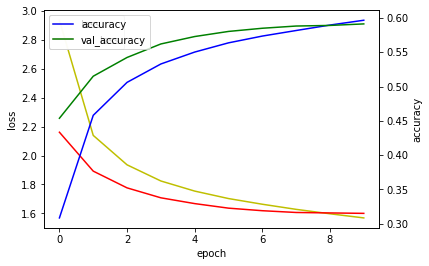

In [45]:
merge_plot(history)

In [36]:
Model.evaluate(x_test, y_test)

16557/16557 [==============================] - 253s 15ms/step - loss: 1.6006 - accuracy: 0.5908


[1.6006217002868652, 0.5908275842666626]

1. 대분류 예측기 저장

In [275]:
import os
modelpath = '/content/drive/MyDrive/KEDxBOAZMY/MODELS'
Model.save(os.path.join(modelpath, 'Model_A'))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/KEDxBOAZMY/MODELS/Model_A/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/KEDxBOAZMY/MODELS/Model_A/assets


2. 중분류 예측기 저장

In [37]:
import os
modelpath = '/content/drive/MyDrive/KEDxBOAZMY/MODELS'
Model.save(os.path.join(modelpath, 'Model_B'))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/KEDxBOAZMY/MODELS/Model_B/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/KEDxBOAZMY/MODELS/Model_B/assets


3. 소분류 예측기 저장

In [ ]:
import os
modelpath = '/content/drive/MyDrive/KEDxBOAZMY/MODELS'
Model.save(os.path.join(modelpath, 'Model_C'))

4. 세분류 예측기 저장

In [ ]:
import os
modelpath = '/content/drive/MyDrive/KEDxBOAZMY/MODELS'
Model.save(os.path.join(modelpath, 'Model_D'))

4. Test Data에 대한 예측 도출

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os

modelpath = '/content/drive/MyDrive/KEDxBOAZMY/MODELS'
def load_model(model_name):
  model_path = os.path.join(modelpath, str(model_name))
  model_A = tf.keras.models.load_model(model_path)

  return model_A

In [7]:
Model_A = load_model('Model_A')

In [8]:
Model_A.summary()

Model: "classifier_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_28 (Encoder)         multiple                  32935268  
_________________________________________________________________
gru_6 (GRU)                  multiple                  61440     
_________________________________________________________________
dense_837 (Dense)            multiple                  16512     
_________________________________________________________________
batch_normalization_34 (Batc multiple                  512       
_________________________________________________________________
dropout_320 (Dropout)        multiple                  0         
_________________________________________________________________
dense_838 (Dense)            multiple                  2709      
Total params: 33,016,441
Trainable params: 33,016,185
Non-trainable params: 256
_______________________________________

In [ ]:
Model_A.

###...............................................................

In [ ]:
from tensorflow.keras import layers

In [ ]:
class CNNClassifier(tf.keras.Model):
  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name = kargs['model_name'])
    self.embedding = layers.Embedding(input_dim = kargs['vocab_size'],
                                      output_dim = kargs['embedding_size'],
                                      )
    self.conv_list = [layers.Conv1D(filters = kargs['num_filters'], kernel_size = kernel_size,
                                    strides = 1, padding = 'valid',
                                    activation = tf.keras.activations.relu, 
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.))
    for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])

    self.fc1 = layers.Dense(units = kargs['hidden_dimension'],
                                          activation = tf.keras.activations.relu,
                                          kernel_constraint = tf.keras.constraints.MaxNorm(max_value = 3.))
    self.fc2 = layers.Dense(units = kargs['output_dimension'],
                            activation = tf.keras.activations.softmax,
                            kernel_constraint = tf.keras.constraints.MaxNorm(max_value = 3.))
  
  def call(self, x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)

    return x


In [ ]:
kargs = {'model_name' : "CNN",
         'vocab_size' : data_configs['vocab_size'],
         'embedding_size' : 128,
         'num_filters' : 100,
         'dropout_rate' : 0.4,
         'hidden_dimension' : 250,
         'output_dimension' : 79}         

model = CNNClassifier(**kargs)

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(name = 'accuracy')]
)

from tensorflow.keras.callbacks import EarlyStopping
earlystop_callback = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.001, patience = 3)

#checkpoint_path = DATA_PATH + model_name + '/weights.h5'
#checkpoint_dir = os.path.dirname(checkpoint_path)

#cp_callback = ModelCheckpoint(
    #checkpoint_path, monitor = 'val_accuracy', verbose = 1,
    #save_best_only = True, save_weights_only = True)

history = model.fit(train_inputs, train_labels, batch_size = BATCH_SIZE, epochs = 20,
                    validation_split = 0.2, callbacks = [earlystop_callback])

Epoch 1/20
2854/5519 [==============>...............] - ETA: 30:34 - loss: 2.2498 - accuracy: 0.4451